# Import Relevant Libararies

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import datetime
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pandas.api.types import CategoricalDtype

from matplotlib import pyplot as plt
import matplotlib.category as mcat

plt.rcParams['figure.figsize'] = (10,5)
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

# Analysis of variables for selected sliced areas 

Sliced areas to focus on  were selected previously from the GIFs based on where seagrass was present. Now, xarrays of these need to be created to undergo the creation of the timeseries

## Read in the data

Again, Hervey Bay will be used as the example. 

The below combines each years xarray into a single xarray from the Hervey Bay folder:

In [25]:
HerveyBay_ds = xr.open_mfdataset('HerveyBay/HerveyBay*.nc')

Here we can view the merged xarray

In [26]:
HerveyBay_ds

<xarray.Dataset>
Dimensions:         (time: 1461, latitude: 33, longitude: 34)
Coordinates:
  * time            (time) datetime64[ns] 2011-01-01T02:00:00 ... 2014-12-31T...
  * latitude        (latitude) float64 -25.79 -25.76 -25.73 ... -24.86 -24.83
  * longitude       (longitude) float64 152.3 152.3 152.4 ... 153.2 153.3 153.3
Data variables:
    TOTAL_NITROGEN  (time, latitude, longitude) float32 dask.array<chunksize=(365, 33, 34), meta=np.ndarray>
    temp            (time, latitude, longitude) float32 dask.array<chunksize=(365, 33, 34), meta=np.ndarray>
    salinity        (time, latitude, longitude) float32 dask.array<chunksize=(365, 33, 34), meta=np.ndarray>
    light           (time, latitude, longitude) float32 dask.array<chunksize=(365, 33, 34), meta=np.ndarray>
    seagrass        (time, latitude, longitude) float32 dask.array<chunksize=(365, 33, 34), meta=np.ndarray>

### Reduce the dataset

Now we selected for the focus area by defining the sliced longitude and latitude and create a new dataset

In [27]:
smallhbds = HerveyBay_ds.sel(latitude=slice(-25.5,-25.2),longitude=slice(152.65,152.95))

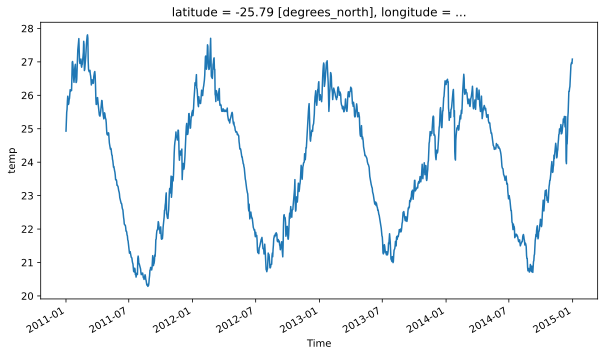

In [28]:
HerveyBay_ds.sel(latitude=-27.2,longitude=153.6, method='nearest').temp.plot()

## Plotting the timeseries

Now an xarray has been created for the focus area, we can plot the selected variables.

We will use nitrogen change as the example.

The below will return a timeseries plot and include the min, max and mean values

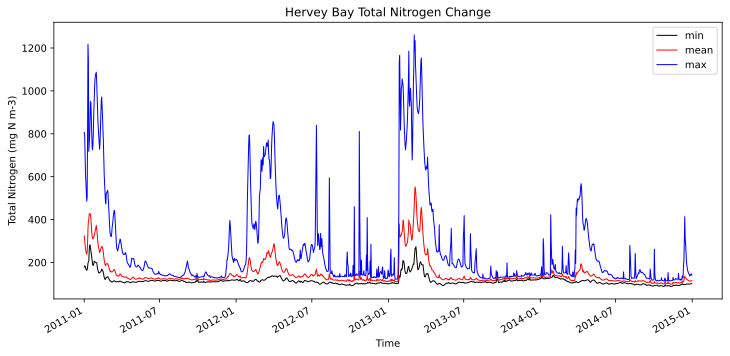

In [29]:
fig, ax1 = plt.subplots(figsize=(12, 5))
smallhbds.min(dim=('latitude', 'longitude')).TOTAL_NITROGEN.plot(lw=1, color="k", label='min')
smallhbds.mean(dim=('latitude', 'longitude')).TOTAL_NITROGEN.plot(lw=1, color="red", label='mean')
smallhbds.max(dim=('latitude', 'longitude')).TOTAL_NITROGEN.plot(lw=1, color="blue", label='max')
ax1.legend()
plt.title('Hervey Bay Total Nitrogen Change')
plt.ylabel("Total Nitrogen (mg N m-3)")
#Saving in the 'HerveyBay' folder 
plt.savefig('HerveyBay/Hervey Bay Total Nitrogen Sliced', dpi=300, bbox_inches = "tight")
plt.show()

This will need to be repeated for each desired variable at each site.

For light intensity above seagrass, the data produced a lot of noise. To reduce this, we created the plot using rolling  monthly means. 

First we define the mean, min and max for 30 day intervals

In [32]:
max_region1 = smallhbds.max(dim=('latitude', 'longitude'))
month_max_region1 = max_region1.rolling(time=30,center=True).mean() # 30-day interval
min_region1 = smallhbds.min(dim=('latitude', 'longitude'))
month_min_region1 = min_region1.rolling(time=30,center=True).mean()
mean_region1 = smallhbds.mean(dim=('latitude', 'longitude'))
month_mean_region1 = mean_region1.rolling(time=30,center=True).mean()

Then we plot the time series 

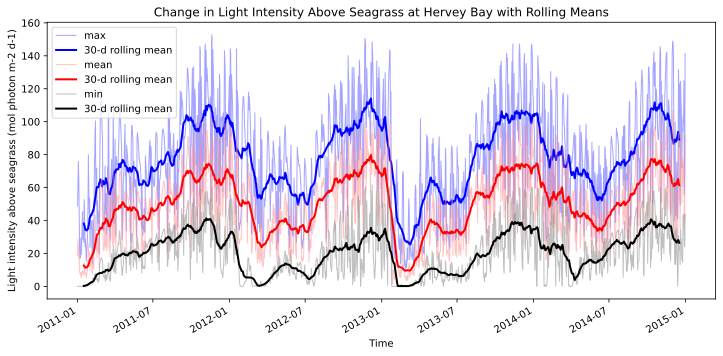

In [33]:
fig, ax1 = plt.subplots(figsize=(12, 5))
smallhbds.max(dim=('latitude', 'longitude')).light.plot(lw=1, alpha=0.5,
                                                            color="#4d4dff",
                                                            label='max')
month_max_region1.light.plot(lw=2, color="b",label='30-d rolling mean')
smallhbds.mean(dim=('latitude', 'longitude')).light.plot(lw=1, alpha=0.5,
                                                            color="#ff8989",
                                                            label='mean')
month_mean_region1.light.plot(lw=2, color="r",label='30-d rolling mean')
smallhbds.min(dim=('latitude', 'longitude')).light.plot(lw=1, alpha=0.5,
                                                            color="gray",
                                                            label='min')
month_min_region1.light.plot(lw=2, color="k",label='30-d rolling mean')

ax1.legend()
plt.title('Change in Light Intensity Above Seagrass at Hervey Bay with Rolling Means')
plt.ylabel('Light intensity above seagrass (mol photon m-2 d-1)')
plt.savefig('Change in Light Intensity Above Seagrass at Hervey Bay sliced Rolling Mean', dpi=300, bbox_inches = "tight")
plt.show()

We only used this for this variable, but if you were to plot the entire region or find similar noise issues in other plots, rolling monthly means may be used

# Analysis of Interactions between Variables and Extreme Weather Events

In [3]:
# Reading the netCDF data for Hervey Bay
HerveyBay_ds = xr.open_mfdataset('HerveyBay/HerveyBay*.nc')

In [4]:
# Reading the cyclone data
url = 'GBR_cyclones.csv'
cyclones = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(13), index_col='SID',
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
cyclones

,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,CATEGORY
SID,,,,,,,,,,,,
2011023S16147,2011,6,SP,EA,ANTHONY,2011-01-22 15:00:00,NR,-15.5881,147.218,,,
2011023S16147,2011,6,SP,EA,ANTHONY,2011-01-22 18:00:00,TS,-15.5000,147.800,,,
2011023S16147,2011,6,SP,EA,ANTHONY,2011-01-22 21:00:00,TS,-15.4618,148.348,,,
2011023S16147,2011,6,SP,EA,ANTHONY,2011-01-23 00:00:00,TS,-15.4600,148.980,30.0,997.0,tropical depression
2011023S16147,2011,6,SP,EA,ANTHONY,2011-01-23 03:00:00,TS,-15.5585,149.895,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
2014092S11159,2014,24,SP,MM,ITA,2014-04-18 06:00:00,NR,-41.4000,165.700,40.0,982.0,tropical storm
2014092S11159,2014,24,SP,MM,ITA,2014-04-18 09:00:00,NR,-41.8348,165.489,,,
2014092S11159,2014,24,SP,MM,ITA,2014-04-18 12:00:00,NR,-42.3000,165.400,40.0,984.0,tropical storm


First we define a function to extract the data for each cyclone that we will plot onto our time series:

In [5]:
def cycData(cycName):
    
    # Specifying columns we don't need by index number
    cols = [0, 1, 2, 3, 4, 6, 9, 10]
    
    # Converts the string of the cyclone name into upper case which is the format the names are in in the dataframe
    cycNameUpper = cycName.upper()
    
    # Extracting specified cyclone data, dropping specified columns and setting the index to time
    df_cycName = cyclones[cyclones["NAME"].str.contains(cycNameUpper) == True].drop(cyclones.columns[cols],
                         axis=1) # axis=1 indicates we are dropping from the columns rather than the index
    
    return df_cycName

# Calling the function
Ita = cycData('Ita')
Anthony = cycData('Anthony')
Oswald = cycData('Oswald')
Dylan = cycData('Dylan')
Hadi = cycData('Hadi')
Jasmine = cycData('Jasmine')
Sandra = cycData('Sandra')
Tim = cycData('Tim')
Yasi = cycData('Yasi')

First, we calculate the rolling mean for use in our time series to make the data easier to interpret:

In [6]:
max_region = HerveyBay_ds.max(dim=('latitude', 'longitude'))
month_max_region = max_region.rolling(time=30,center=True).mean() # 30-day interval
min_region = HerveyBay_ds.min(dim=('latitude', 'longitude'))
month_min_region = min_region.rolling(time=30,center=True).mean()
mean_region = HerveyBay_ds.mean(dim=('latitude', 'longitude'))
month_mean_region = mean_region.rolling(time=30,center=True).mean()

Now we will plot time series for each variable with the incidence of each relevant cyclone and [floods from the Bureau of Meteorology (BOM)](http://www.bom.gov.au/qld/flood/fld_reports/reports.shtml) impacting the region. As these figures will be combined into a multi-figure panel for our report, we will only include the legends that are needed.

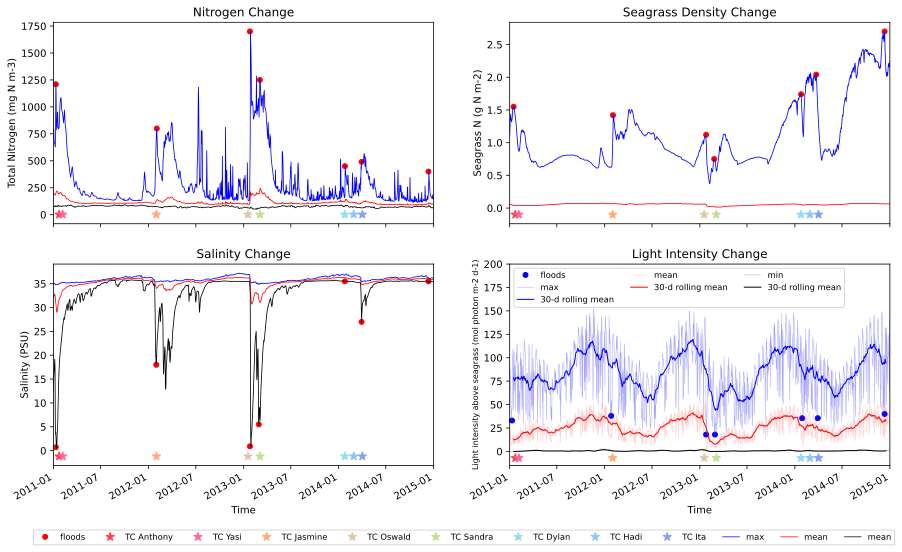

In [7]:
# Setting up a multi-panel 2x2 figure with four subplots for our variables and setting the title
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharex=True, figsize=(15, 8))
fig.suptitle('Hervey Bay', weight='bold')

# Plotting total nitrogen

'''
Plotting the following floods at the associated peaks in maximum total nitrogen y-values:
- 2010–2011 Queensland floods (Mary River Basin - follows TC Tasha)
- Mary river floods associated with TC Jasmine
- Severe flooding associated with TC Oswald
- Burnett Rivers floods associated with TC Sandra
- Flooding associated with TC Dylan
- Flooding at Mary & Baffle rivers following high rainfall
- Wide Bay-Burnett flood
'''
ax1.plot(mdates.date2num(dt.datetime(2011, 1, 10)), 1210, 'o', color='r', label='floods', markersize=5,
         zorder=0) # 0 zorder plots at the bottom layer
ax1.plot(mdates.date2num(dt.datetime(2012, 2, 2)), 800, 'o', color='r', markersize=5, zorder=0)
ax1.plot(mdates.date2num(dt.datetime(2013, 1, 25)), 1700, 'o', color='r', markersize=5, zorder=0)
ax1.plot(mdates.date2num(dt.datetime(2013, 3, 4)), 1250, 'o', color='r', markersize=5, zorder=0)
ax1.plot(mdates.date2num(dt.datetime(2014, 1, 25)), 450, 'o', color='r', markersize=5, zorder=0)
ax1.plot(mdates.date2num(dt.datetime(2014, 3, 30)), 490, 'o', color='r', markersize=5, zorder=0)
ax1.plot(mdates.date2num(dt.datetime(2014, 12, 12)), 400, 'o', color='r', markersize=5, zorder=0)

# Plotting the incidence of each relevant cyclone at the bottom of the plot
ax1.plot(Anthony["ISO_TIME"][0], 0.8, '*', color="#ff3f4d", markersize=9, label='TC Anthony', zorder=0)
ax1.plot(Yasi["ISO_TIME"][-1], 1.63, '*', color="#ff669b", markersize=9, label='TC Yasi', zorder=0)
ax1.plot(Jasmine["ISO_TIME"][0], 1, '*', color="#ffac75", markersize=9, label='TC Jasmine', zorder=0)
ax1.plot(Oswald["ISO_TIME"][0], 1.22, '*', color="#dfc7a7", markersize=9, label='TC Oswald', zorder=0)
ax1.plot(Sandra["ISO_TIME"][0], 0.5, '*', color="#c1df90", markersize=9, label='TC Sandra', zorder=0)
ax1.plot(Dylan["ISO_TIME"][0], 1, '*', color="#91DDF2", markersize=9, label='TC Dylan', zorder=0)
ax1.plot(Hadi["ISO_TIME"][0], 1.7, '*', color="#8BC6FC", markersize=9, label='TC Hadi', zorder=0)
ax1.plot(Ita["ISO_TIME"][0], 0.6, '*', color="#85A1F2", markersize=9, label='TC Ita', zorder=0)

# Plotting min, mean and max total nitrogen values
HerveyBay_ds.max(dim=('latitude', 'longitude')).TOTAL_NITROGEN.plot(ax=ax1, lw=0.8,
                                                            color="blue",
                                                            label='max', 
                                                                    zorder=1) # 1 zorder plots above the cyclone and flood plots
HerveyBay_ds.mean(dim=('latitude', 'longitude')).TOTAL_NITROGEN.plot(ax=ax1, lw=0.8, 
                                                            color="red",
                                                            label='mean', zorder=1)
HerveyBay_ds.min(dim=('latitude', 'longitude')).TOTAL_NITROGEN.plot(ax=ax1, lw=0.8,
                                                            color="k",
                                                            label='min', zorder=1)

# Adding axis labels, legend and title and saving the figure.
ax1.set_ylabel("Total Nitrogen (mg N m-3)", color="k")
ax1.set_xlabel('') # The label is left blank as it is shared with the plot below it and thus not needed
ax1.set_title('Nitrogen Change')

# Plotting seagrass density
'''
Plotting the following floods at the y-values corresponding to a drop in maximum seagrass density:
- 2010–2011 Queensland floods (Mary River Basin - follows TC Tasha)
- Mary river floods associated with TC Jasmine
- Severe flooding associated with TC Oswald
- Burnett Rivers floods associated with TC Sandra
- Flooding associated with TC Dylan
- Flooding at Mary & Baffle rivers following high rainfall
- Wide Bay-Burnett flood
'''
ax2.plot(mdates.date2num(dt.datetime(2011, 1, 16)), 1.55, 'o', color='r', label='floods', markersize=5,
         zorder=0) # 0 zorder plots at the bottom layer
ax2.plot(mdates.date2num(dt.datetime(2012, 2, 2)), 1.42, 'o', color='r', markersize=5, zorder=0)
ax2.plot(mdates.date2num(dt.datetime(2013, 1, 25)), 1.12, 'o', color='r', markersize=5, zorder=0)
ax2.plot(mdates.date2num(dt.datetime(2013, 2, 25)), 0.75, 'o', color='r', markersize=5, zorder=0)
ax2.plot(mdates.date2num(dt.datetime(2014, 1, 25)), 1.74, 'o', color='r', markersize=5, zorder=0)
ax2.plot(mdates.date2num(dt.datetime(2014, 3, 24)), 2.04, 'o', color='r', markersize=5, zorder=0)
ax2.plot(mdates.date2num(dt.datetime(2014, 12, 12)), 2.7, 'o', color='r', markersize=5, zorder=0)

# Plotting the incidence of each relevant cyclone at the bottom of the plot
ax2.plot(Anthony["ISO_TIME"][0],-0.1, '*', color="#ff3f4d", markersize=9, label='TC Anthony', zorder=0)
ax2.plot(Yasi["ISO_TIME"][-1], -0.1, '*', color="#ff669b", markersize=9, label='TC Yasi', zorder=0)
ax2.plot(Jasmine["ISO_TIME"][0], -0.1, '*', color="#ffac75", markersize=9, label='TC Jasmine', zorder=0)
ax2.plot(Oswald["ISO_TIME"][0], -0.1, '*', color="#dfc7a7", markersize=9, label='TC Oswald', zorder=0)
ax2.plot(Sandra["ISO_TIME"][0], -0.1, '*', color="#c1df90", markersize=9, label='TC Sandra', zorder=0)
ax2.plot(Dylan["ISO_TIME"][0],-0.1, '*', color="#91DDF2", markersize=9, label='TC Dylan', zorder=0)
ax2.plot(Hadi["ISO_TIME"][0], -0.1, '*', color="#8BC6FC", markersize=9, label='TC Hadi', zorder=0)
ax2.plot(Ita["ISO_TIME"][0], -0.1, '*', color="#85A1F2", markersize=9, label='TC Ita',  zorder=0)

# Plotting seagrass density. The min is not plotted here as it remains stable at zero for the duration of the study period.
HerveyBay_ds.max(dim=('latitude', 'longitude')).seagrass.plot(ax=ax2, lw=0.8,
                                                            color="blue",
                                                            label='max', 
                                                              zorder=1) # 1 zorder plots above the cyclone and flood plots
HerveyBay_ds.mean(dim=('latitude', 'longitude')).seagrass.plot(ax=ax2, lw=0.8, 
                                                            color="red",
                                                            label='mean', zorder=1)

# Adding axis labels and title and saving the figure
ax2.set_ylabel("Seagrass N (g N m-2)", color="k")
ax2.set_xlabel('') # The label is left blank as it is shared with the plot below it and thus not needed
ax2.set_title('Seagrass Density Change')

# Plotting salinity

'''
Plotting the following floods at the associated troughs in minimum salinity y-values:
- 2010–2011 Queensland floods (Mary River Basin - follows TC Tasha)
- Mary river floods associated with TC Jasmine
- Severe flooding associated with TC Oswald
- Burnett Rivers floods associated with TC Sandra
- Flooding associated with TC Dylan
- Flooding at Mary & Baffle rivers following high rainfall
- Wide Bay-Burnett flood
'''
ax3.plot(mdates.date2num(dt.datetime(2011, 1, 10)), 0.7, 'o', color='r', label='floods', markersize=5, 
         zorder=0) # 0 zorder plots at the bottom layer
ax3.plot(mdates.date2num(dt.datetime(2012, 1, 31)), 18, 'o', color='r', markersize=5, zorder=0)
ax3.plot(mdates.date2num(dt.datetime(2013, 1, 25)), 0.9, 'o', color='r', markersize=5, zorder=0)
ax3.plot(mdates.date2num(dt.datetime(2013, 2, 28)), 5.5, 'o', color='r', markersize=5, zorder=0)
ax3.plot(mdates.date2num(dt.datetime(2014, 1, 25)), 35.5, 'o', color='r', markersize=5, zorder=0)
ax3.plot(mdates.date2num(dt.datetime(2014, 3, 30)), 27, 'o', color='r', markersize=5, zorder=0)
ax3.plot(mdates.date2num(dt.datetime(2014, 12, 12)), 35.5, 'o', color='r', markersize=5, zorder=0)

# Plotting the incidence of each relevant cyclone at the bottom of the plot
ax3.plot(Anthony["ISO_TIME"][0], -1.2, '*', color="#ff3f4d", markersize=9, label='TC Anthony', zorder=0)
ax3.plot(Yasi["ISO_TIME"][-1], -1.2, '*', color="#ff669b", markersize=9, label='TC Yasi',zorder=0)
ax3.plot(Jasmine["ISO_TIME"][0], -1.2, '*', color="#ffac75", markersize=9, label='TC Jasmine', zorder=0)
ax3.plot(Oswald["ISO_TIME"][0], -1.2, '*', color="#dfc7a7", markersize=9, label='TC Oswald', zorder=0)
ax3.plot(Sandra["ISO_TIME"][0], -1.2, '*', color="#c1df90", markersize=9, label='TC Sandra', zorder=0)
ax3.plot(Dylan["ISO_TIME"][0], -1.2, '*', color="#91DDF2", markersize=9, label='TC Dylan', zorder=0)
ax3.plot(Hadi["ISO_TIME"][0], -1.2, '*', color="#8BC6FC", markersize=9, label='TC Hadi', zorder=0)
ax3.plot(Ita["ISO_TIME"][0], -1.2, '*', color="#85A1F2", markersize=9, label='TC Ita',  zorder=0)

# Plotting min, mean and max salinity values
HerveyBay_ds.max(dim=('latitude', 'longitude')).salinity.plot(ax=ax3, lw=0.8, color="blue",label='max', 
                                                              zorder=1) # 1 zorder plots above the cyclone and flood plots
HerveyBay_ds.mean(dim=('latitude', 'longitude')).salinity.plot(ax=ax3, lw=0.8, color="red",label='mean', zorder=1)
HerveyBay_ds.min(dim=('latitude', 'longitude')).salinity.plot(ax=ax3, lw=0.8, color="k",label='mean', zorder=1)

# Adding axis labels and title and saving the figure
ax3.set_ylabel("Salinity (PSU)", color="k")
ax3.set_title('Salinity Change')

# Plotting light intensity

'''
Plotting the following floods at the associated lowest maximum light intensity y-values:
- 2010–2011 Queensland floods (Mary River Basin - follows TC Tasha)
- Mary river floods associated with TC Jasmine
- Severe flooding associated with TC Oswald
- Burnett Rivers floods associated with TC Sandra
- Flooding associated with TC Dylan
- Flooding at Mary & Baffle rivers following high rainfall
- Wide Bay-Burnett flood
'''
ax4.plot(mdates.date2num(dt.datetime(2011, 1, 10)), 33, 'o', color='b', label='floods', markersize=5, 
         zorder=0) # 0 zorder plots at the bottom layer
ax4.plot(mdates.date2num(dt.datetime(2012, 1, 26)), 38, 'o', color='b', markersize=5, zorder=0)
ax4.plot(mdates.date2num(dt.datetime(2013, 1, 25)), 18, 'o', color='b', markersize=5, zorder=0)
ax4.plot(mdates.date2num(dt.datetime(2013, 2, 28)), 18, 'o', color='b', markersize=5, zorder=0)
ax4.plot(mdates.date2num(dt.datetime(2014, 1, 29)), 35.5, 'o', color='b', markersize=5, zorder=0)
ax4.plot(mdates.date2num(dt.datetime(2014, 3, 30)), 35.5, 'o', color='b', markersize=5, zorder=0)
ax4.plot(mdates.date2num(dt.datetime(2014, 12, 12)), 40, 'o', color='b', markersize=5, zorder=0)

# Plotting the incidence of each relevant cyclone at the bottom of the plot
ax4.plot(Anthony["ISO_TIME"][0], -7, '*', color="#ff3f4d", markersize=9, label='', zorder=0)
ax4.plot(Yasi["ISO_TIME"][-1], -7, '*', color="#ff669b", markersize=9, label='',zorder=0)
ax4.plot(Jasmine["ISO_TIME"][0], -7, '*', color="#ffac75", markersize=9, label='', zorder=0)
ax4.plot(Oswald["ISO_TIME"][0], -7, '*', color="#dfc7a7", markersize=9, label='', zorder=0)
ax4.plot(Sandra["ISO_TIME"][0], -7, '*', color="#c1df90", markersize=9, label='', zorder=0)
ax4.plot(Dylan["ISO_TIME"][0], -7, '*', color="#91DDF2", markersize=9, label='', zorder=0)
ax4.plot(Hadi["ISO_TIME"][0], -7, '*', color="#8BC6FC", markersize=9, label='', zorder=0)
ax4.plot(Ita["ISO_TIME"][0], -7, '*', color="#85A1F2", markersize=9, label='',  zorder=0)

# Plotting max, mean and min light intensity values with rolling means
HerveyBay_ds.max(dim=('latitude', 'longitude')).light.plot(ax=ax4,lw=0.5, alpha=0.5,
                                                            color="#4d4dff",
                                                            label='max', 
                                                           zorder=1) # 1 zorder plots above the cyclone and flood plots
month_max_region.light.plot(ax=ax4, lw=1, color="blue",label='30-d rolling mean', zorder=1)
HerveyBay_ds.mean(dim=('latitude', 'longitude')).light.plot(ax=ax4, lw=0.5, alpha=0.2,
                                                            color="r",
                                                            label='mean', zorder=1)
month_mean_region.light.plot(ax=ax4, lw=1, color="red",label='30-d rolling mean', zorder=1)
HerveyBay_ds.min(dim=('latitude', 'longitude')).light.plot(ax=ax4, lw=0.5, alpha=0.5,
                                                            color="grey",
                                                            label='min', zorder=1)
month_min_region.light.plot(ax=ax4, lw=1, color="k",label='30-d rolling mean', zorder=1)

# Setting the limits of the x and y axes to use all available space along the x-axis and enable enough room for the legend
plt.xlim([datetime.date(2011, 1, 1), datetime.date(2015, 1, 1)])
plt.ylim(-15, 200)

# Adding axis labels, legend and title and saving the figure
ax4.set_xlabel("Time", color="k")
ax4.set_ylabel("Light intensity above seagrass (mol photon m-2 d-1)", color="k", fontsize='8')
ax4.legend(loc=2, fontsize='small', ncol=3)
ax4.set_title('Light Intensity Change')

# We get the handles and labels for the salinity legend as it includes all the important information
ax3.get_legend_handles_labels()

# The legend is placed at the bottom of the figure
ax3.legend(loc='upper center', 
             bbox_to_anchor=(1.08, -0.3),fancybox=False, shadow=False, ncol=13, fontsize='small')
plt.savefig('HerveyBay/Hervey Bay Time Series', dpi=300, bbox_inches='tight')